In [1]:
import pandas as pd
import numpy as np

In [2]:
from Bio import SeqIO

files = ["RefSeq/HIV.txt", "RefSeq/Mers.txt", "RefSeq/Sars.txt", "RefSeq/Sudan_Ebola.txt", "RefSeq/Varicella.txt"]
data = []
for file in files:
    for record in SeqIO.parse(file, "fasta"):
        data.append({
            "filename": file,
            "description": record.description,
            "sequence": str(record.seq)
        })
df = pd.DataFrame(data)
df["name"] = ["HIV", "Mers", "Sars-Cov-2", "Ebola","Varicella"]


In [3]:
df.head(10)

,filename,description,sequence,name
0,RefSeq/HIV.txt,"NC_001802.1 Human immunodeficiency virus 1, co...",GGTCTCTCTGGTTAGACCAGATCTGAGCCTGGGAGCTCTCTGGCTA...,HIV
1,RefSeq/Mers.txt,NC_019843.3 Middle East respiratory syndrome-r...,GATTTAAGTGAATAGCTTGGCTATCTCACTTCCCCTCGTTCTCTTG...,Mers
2,RefSeq/Sars.txt,NC_045512.2 Severe acute respiratory syndrome ...,ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGA...,Sars-Cov-2
3,RefSeq/Sudan_Ebola.txt,NC_006432.1 Sudan ebolavirus isolate Sudan vir...,CGGACACACAAAAAGAAAGAAAAGTTTTTTATACTTTTTGTGTGCG...,Ebola
4,RefSeq/Varicella.txt,"NC_001348.1 Human herpesvirus 3, complete genome",AGGCCAGCCCTCTCGCGGCCCCCTCGAGAGAGAAAAAAAAAAGCGA...,Varicella


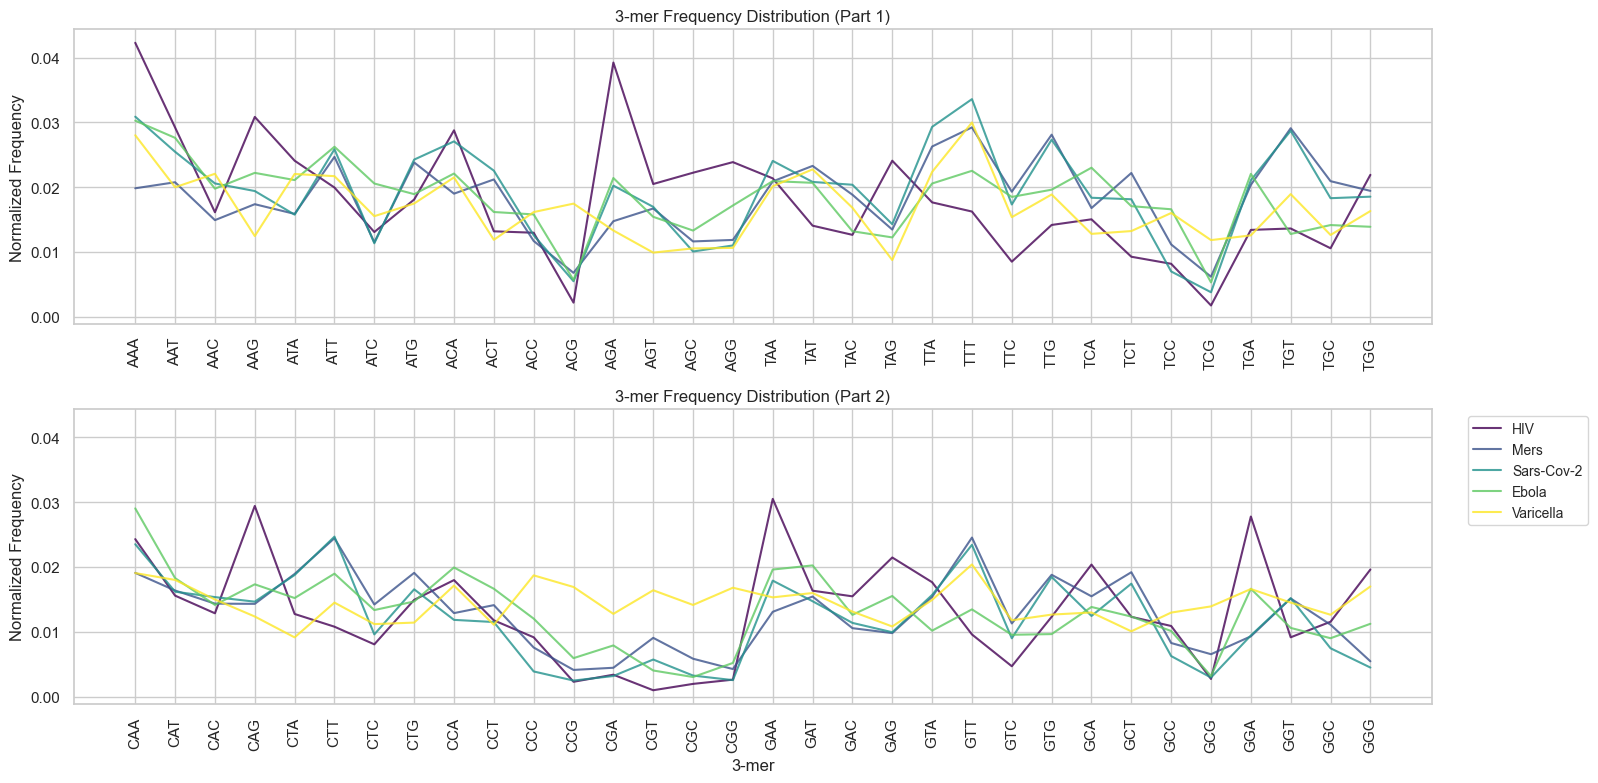

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from collections import Counter
import seaborn as sns
import numpy as np

# Setup
nucleotides = ['A', 'T', 'C', 'G']
k_mers = [''.join(p) for p in itertools.product(nucleotides, repeat=3)]
def count_kmers(seq, k=3):
    seq = seq.upper()
    kmers = [seq[i:i+k] for i in range(len(seq)-k+1)]
    kmers = [kmer for kmer in kmers if all(nuc in nucleotides for nuc in kmer)]
    return Counter(kmers)
freq_data = []
for seq in df['sequence']:
    counts = count_kmers(seq, k=3)
    total = sum(counts.values())
    freqs = [counts.get(kmer, 0) / total if total > 0 else 0 for kmer in k_mers]
    freq_data.append(freqs)
freq_df = pd.DataFrame(freq_data, columns=k_mers)
sns.set(style="whitegrid")
colors = plt.cm.viridis(np.linspace(0, 1, len(freq_df)))
chunk_size = 32
num_chunks = len(k_mers) // chunk_size
fig, axes = plt.subplots(num_chunks, 1, figsize=(16, 4 * num_chunks), sharey=True)
for idx in range(num_chunks):
    start = idx * chunk_size
    end = start + chunk_size
    selected_kmers = k_mers[start:end]
    ax = axes[idx]
    for i, color in enumerate(colors):
        label = df["name"].iloc[i] if "name" in df.columns else f"Seq {i+1}"
        ax.plot(freq_df[selected_kmers].iloc[i].values, alpha=0.8, color=color, label=label)
    ax.set_xticks(range(chunk_size))
    ax.set_xticklabels(selected_kmers, rotation=90)
    ax.set_title(f'3-mer Frequency Distribution (Part {idx+1})')
    ax.set_ylabel('Normalized Frequency')
axes[-1].set_xlabel('3-mer')
axes[-1].legend(loc='upper right', bbox_to_anchor=(1.12, 1.0), fontsize='small', ncol=1)
plt.tight_layout()
plt.show()

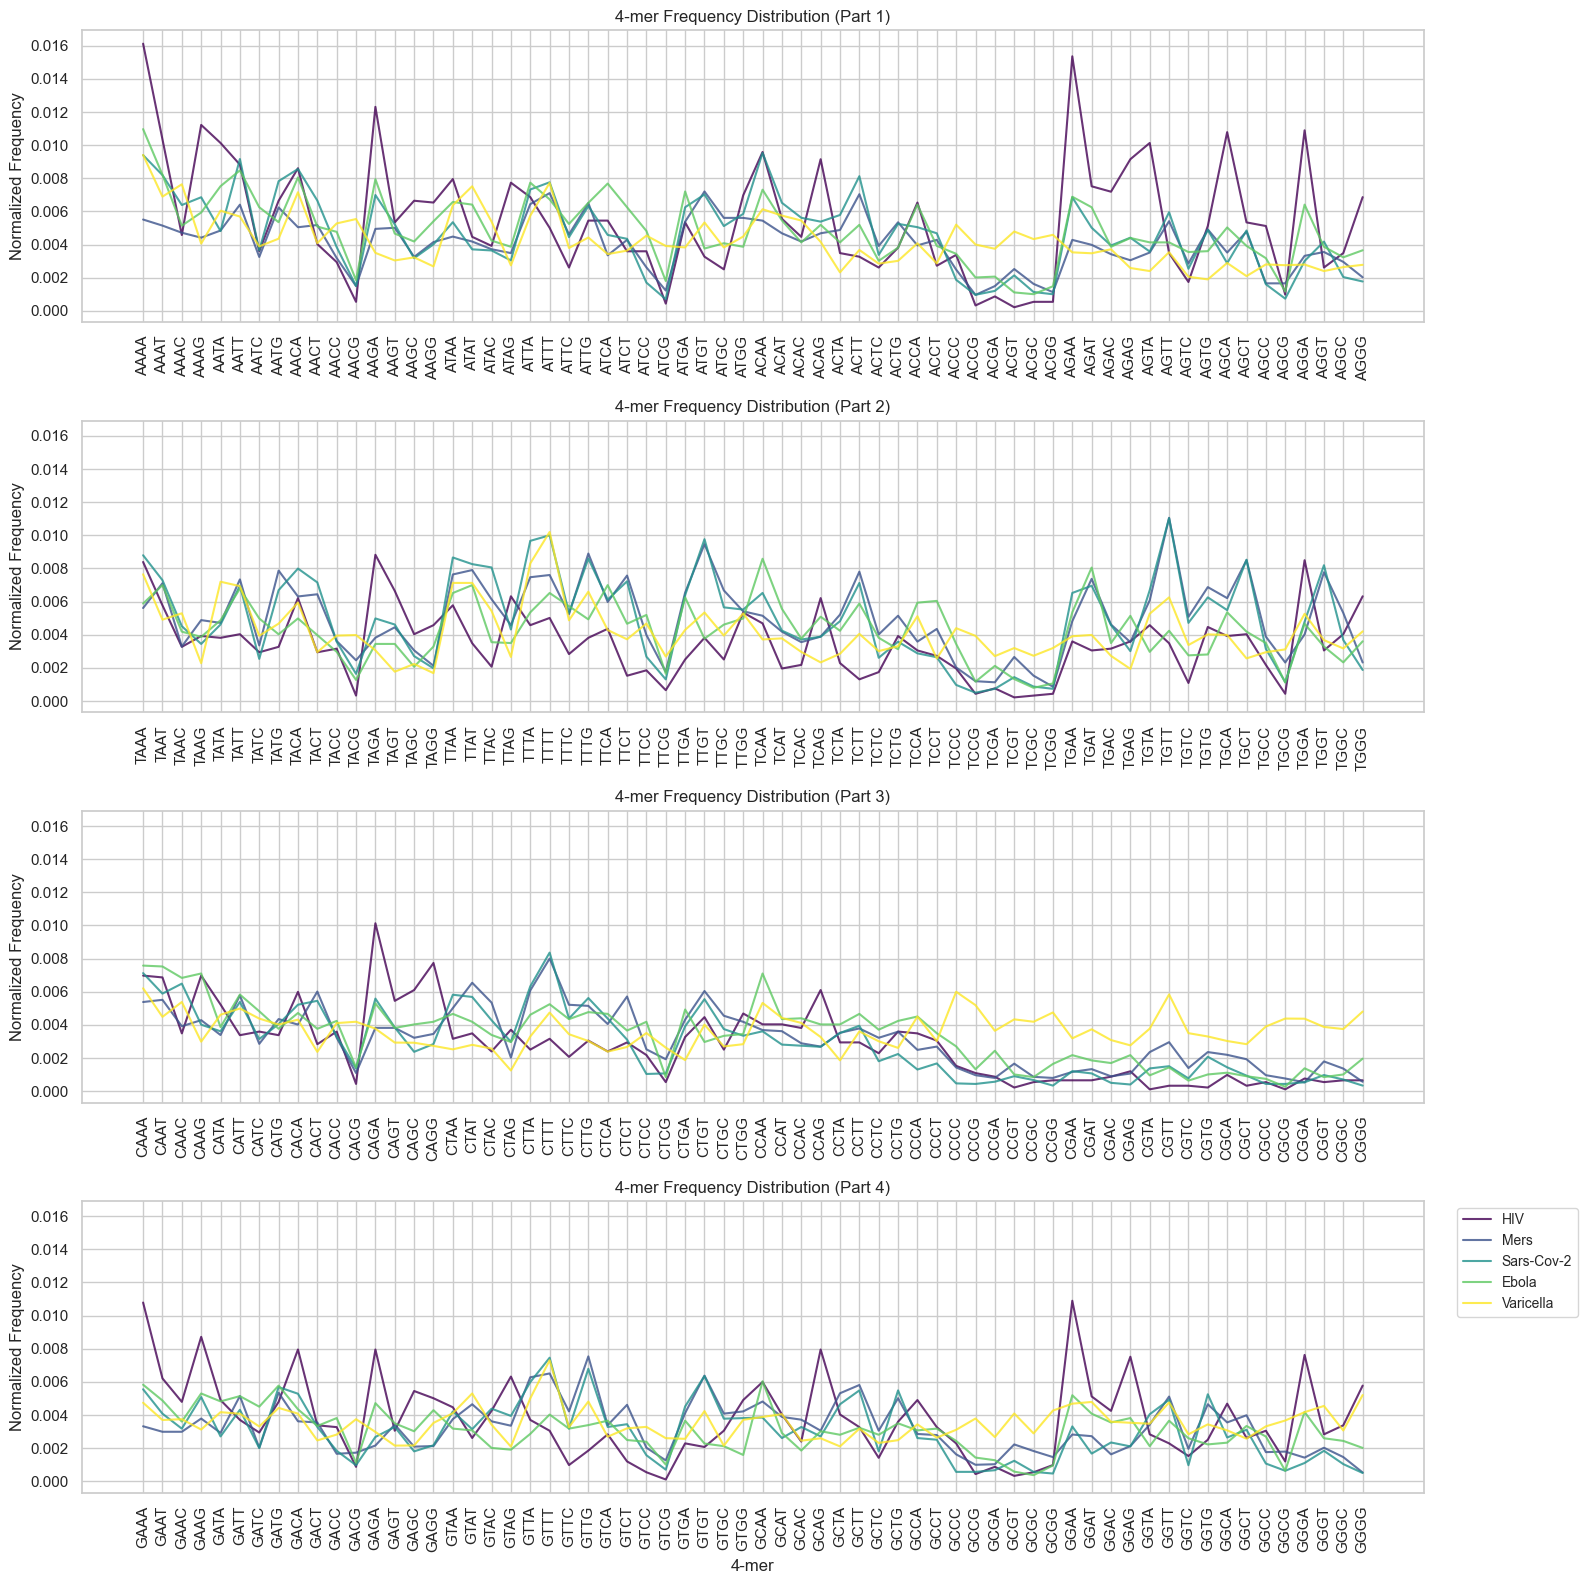

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from collections import Counter
import seaborn as sns
import numpy as np
k = 4
nucleotides = ['A', 'T', 'C', 'G']
k_mers = [''.join(p) for p in itertools.product(nucleotides, repeat=k)]

def count_kmers(seq, k=4):
    seq = seq.upper()
    kmers = [seq[i:i+k] for i in range(len(seq)-k+1)]
    kmers = [kmer for kmer in kmers if all(nuc in nucleotides for nuc in kmer)]
    return Counter(kmers)
freq_data = []
for seq in df['sequence']:
    counts = count_kmers(seq, k=4)
    total = sum(counts.values())
    freqs = [counts.get(kmer, 0) / total if total > 0 else 0 for kmer in k_mers]
    freq_data.append(freqs)

freq_df = pd.DataFrame(freq_data, columns=k_mers)
sns.set(style="whitegrid")
colors = plt.cm.viridis(np.linspace(0, 1, len(freq_df)))
chunk_size = 64
num_chunks = len(k_mers) // chunk_size
fig, axes = plt.subplots(num_chunks, 1, figsize=(16, 4 * num_chunks), sharey=True)
for idx in range(num_chunks):
    start = idx * chunk_size
    end = start + chunk_size
    selected_kmers = k_mers[start:end]
    ax = axes[idx]
    for i, color in enumerate(colors):
        label = df["name"].iloc[i] if "name" in df.columns else f"Seq {i+1}"
        ax.plot(freq_df[selected_kmers].iloc[i].values, alpha=0.8, color=color, label=label)
    ax.set_xticks(range(chunk_size))
    ax.set_xticklabels(selected_kmers, rotation=90)
    ax.set_title(f'4-mer Frequency Distribution (Part {idx+1})')
    ax.set_ylabel('Normalized Frequency')

axes[-1].set_xlabel('4-mer')
axes[-1].legend(loc='upper right', bbox_to_anchor=(1.12, 1.0), fontsize='small', ncol=1)
plt.tight_layout()
plt.show()


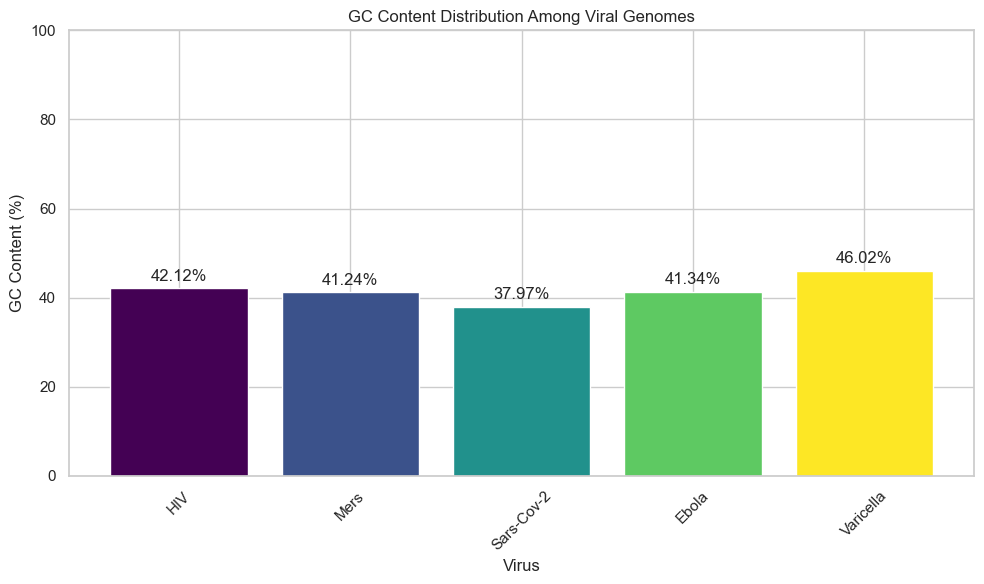

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
def gc_content(genome):
    genome = genome.upper()
    g = genome.count("G")
    c = genome.count("C")
    a = genome.count("A")
    t = genome.count("T")
    total = a + t + g + c
    return 100 * (g + c) / total if total > 0 else 0
df['gc_content'] = df['sequence'].apply(gc_content)

cmap = plt.cm.viridis
colors = cmap(np.linspace(0, 1, len(df)))

highlight_label = "COVID-19"
if highlight_label in df['name'].values:
    idx = df[df['name'] == highlight_label].index[0]
    colors[idx] = 'crimson'

plt.figure(figsize=(10, 6))
bars = plt.bar(df['name'], df['gc_content'], color=colors)
for bar, gc in zip(bars, df['gc_content']):
    plt.text(bar.get_x() + bar.get_width()/2., gc + 1, f'{gc:.2f}%', ha='center', va='bottom')
plt.title("GC Content Distribution Among Viral Genomes")
plt.ylabel("GC Content (%)")
plt.xlabel("Virus")
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [7]:
import pandas as pd

# DNA codon table (standard genetic code)
codon_table = {
    'TTT': 'F', 'TTC': 'F',
    'TTA': 'L', 'TTG': 'L', 'CTT': 'L', 'CTC': 'L', 'CTA': 'L', 'CTG': 'L',
    'ATT': 'I', 'ATC': 'I', 'ATA': 'I',
    'ATG': 'M',  # Start codon
    'GTT': 'V', 'GTC': 'V', 'GTA': 'V', 'GTG': 'V',
    'TCT': 'S', 'TCC': 'S', 'TCA': 'S', 'TCG': 'S', 'AGT': 'S', 'AGC': 'S',
    'CCT': 'P', 'CCC': 'P', 'CCA': 'P', 'CCG': 'P',
    'ACT': 'T', 'ACC': 'T', 'ACA': 'T', 'ACG': 'T',
    'GCT': 'A', 'GCC': 'A', 'GCA': 'A', 'GCG': 'A',
    'TAT': 'Y', 'TAC': 'Y',
    'CAT': 'H', 'CAC': 'H',
    'CAA': 'Q', 'CAG': 'Q',
    'AAT': 'N', 'AAC': 'N',
    'AAA': 'K', 'AAG': 'K',
    'GAT': 'D', 'GAC': 'D',
    'GAA': 'E', 'GAG': 'E',
    'TGT': 'C', 'TGC': 'C',
    'TGG': 'W',
    'CGT': 'R', 'CGC': 'R', 'CGA': 'R', 'CGG': 'R', 'AGA': 'R', 'AGG': 'R',
    'GGT': 'G', 'GGC': 'G', 'GGA': 'G', 'GGG': 'G',
    'TAA': '*', 'TAG': '*', 'TGA': '*'
}

# Function to find all valid ORFs
def find_all_orfs_fast(dna, codon_table, min_aa_length=30):
    dna = dna.upper()
    stop_codons = {'TAA', 'TAG', 'TGA'}
    valid_codons = set(codon_table.keys())
    orfs = []

    for frame in range(3):
        i = frame
        while i <= len(dna) - 3:
            codon = dna[i:i+3]
            if codon == 'ATG':
                protein = []
                j = i
                while j <= len(dna) - 3:
                    next_codon = dna[j:j+3]
                    if next_codon in stop_codons:
                        break
                    aa = codon_table.get(next_codon)
                    if aa is None:
                        break
                    protein.append(aa)
                    j += 3
                if len(protein) >= min_aa_length:
                    orfs.append(''.join(protein))
                i = j  # Jump ahead to skip this ORF
            else:
                i += 3
    return orfs


# Apply ORF extraction to a DataFrame
# Assume df has a 'sequence' column (FASTA DNA content)
df['all_orfs'] = df['sequence'].apply(lambda seq: find_all_orfs_fast(seq, codon_table))
df['orf_count'] = df['all_orfs'].apply(len)
df['longest_orf_length'] = df['all_orfs'].apply(lambda orfs: max([len(p) for p in orfs]) if orfs else 0)
df['fasta_length'] = df['sequence'].str.len()

# Optional: preview


In [8]:
df.head(10)

,filename,description,sequence,name,gc_content,all_orfs,orf_count,longest_orf_length,fasta_length
0,RefSeq/HIV.txt,"NC_001802.1 Human immunodeficiency virus 1, co...",GGTCTCTCTGGTTAGACCAGATCTGAGCCTGGGAGCTCTCTGGCTA...,HIV,42.119595,[MATRLYTFRRKSYPGSSSCSQWIYRSRSYSSRNRAGNSIFSFKIS...,14,912,9181
1,RefSeq/Mers.txt,NC_019843.3 Middle East respiratory syndrome-r...,GATTTAAGTGAATAGCTTGGCTATCTCACTTCCCCTCGTTCTCTTG...,Mers,41.236429,[MCPSGWLDTLDTSQVLVCTWLRGSLLVKIHSWLTNWLIALVQMAA...,71,4391,30119
2,RefSeq/Sars.txt,NC_045512.2 Severe acute respiratory syndrome ...,ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGA...,Sars-Cov-2,37.972779,[MLRCYFPKCSEKNNQGYTPLVVTHNFDFTFSFSPEYSMVFVLFFV...,60,4405,29903
3,RefSeq/Sudan_Ebola.txt,NC_006432.1 Sudan ebolavirus isolate Sudan vir...,CGGACACACAAAAAGAAAGAAAAGTTTTTTATACTTTTTGTGTGCG...,Ebola,41.340397,[MRKISGDLTFQQKISRKSSMTISQDLGQLFISWCRLSAKLVRIII...,34,2210,18875
4,RefSeq/Varicella.txt,"NC_001348.1 Human herpesvirus 3, complete genome",AGGCCAGCCCTCTCGCGGCCCCCTCGAGAGAGAAAAAAAAAAGCGA...,Varicella,46.020307,[MLCTGFFNSFWYSHPYCCRGRHCCRFSRGTSQLNYMKLLSGRGRY...,320,2763,124884


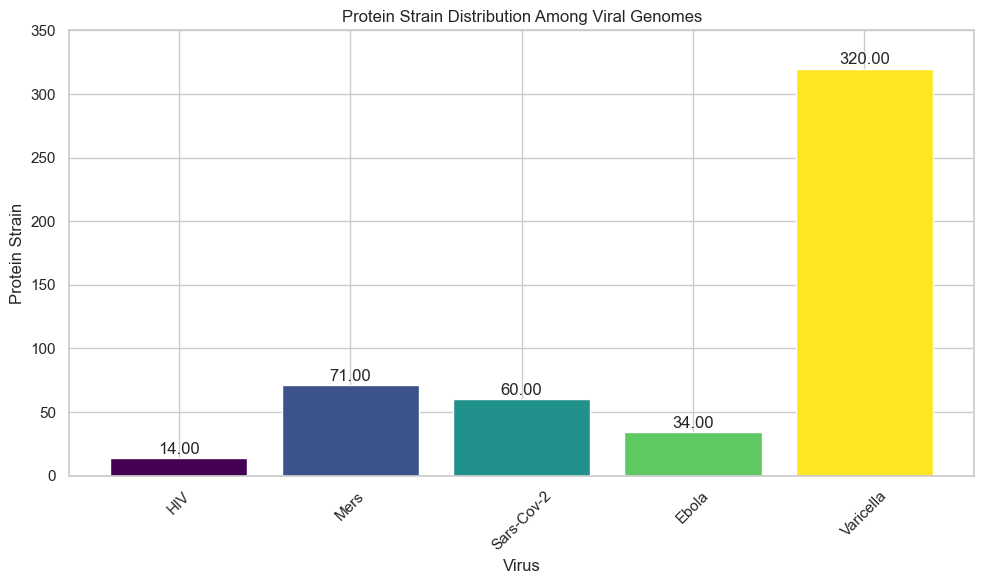

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
cmap = plt.cm.viridis
colors = cmap(np.linspace(0, 1, len(df)))

plt.figure(figsize=(10, 6))
bars = plt.bar(df['name'], df['orf_count'], color=colors)
for bar, gc in zip(bars, df['orf_count']):
    plt.text(bar.get_x() + bar.get_width()/2., gc + 1, f'{gc:.2f}', ha='center', va='bottom')
plt.title("Protein Strain Distribution Among Viral Genomes")
plt.ylabel("Protein Strain")
plt.xlabel("Virus")
plt.ylim(0, df['orf_count'].max() + 30)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


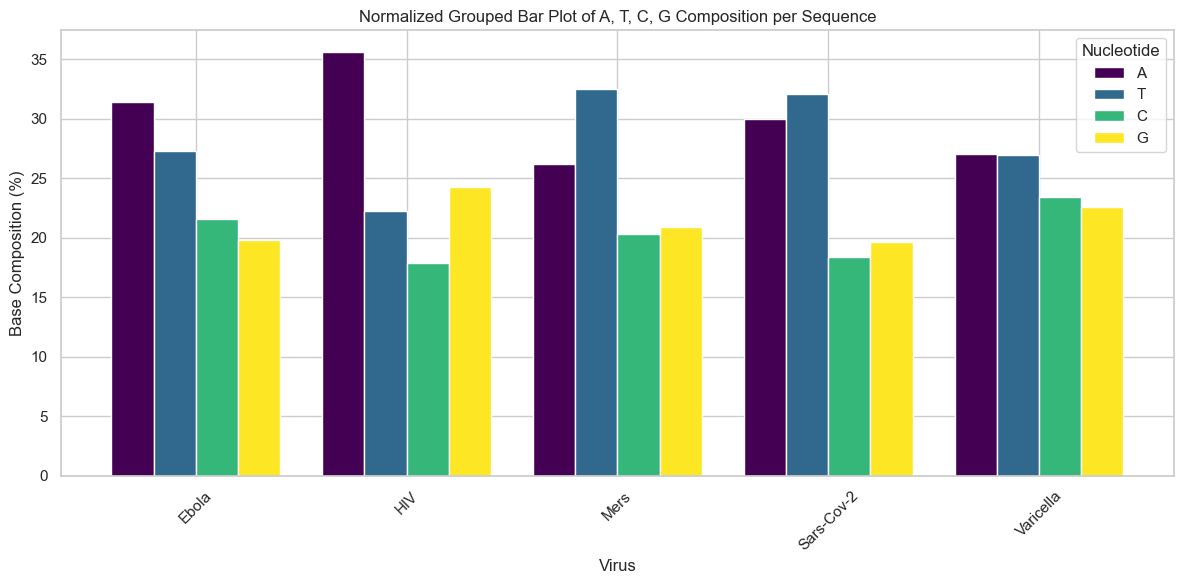

In [10]:
base_counts = df['sequence'].apply(lambda seq: pd.Series({
    'A': seq.upper().count('A'),
    'T': seq.upper().count('T'),
    'C': seq.upper().count('C'),
    'G': seq.upper().count('G')
}))
base_counts['name'] = df['name']
base_long = base_counts.melt(id_vars='name', var_name='Base', value_name='Count')
base_long_norm = base_long.copy()
total_counts = base_long.groupby('name')['Count'].transform('sum')
base_long_norm['Normalized'] = base_long['Count'] / total_counts * 100
base_long_norm['Base'] = pd.Categorical(base_long_norm['Base'], categories=['A', 'T', 'C', 'G'], ordered=True)
base_long_sorted = base_long_norm.sort_values(['name', 'Base'])
names = base_long_sorted['name'].unique()
bases = ['A', 'T', 'C', 'G']
x = np.arange(len(names))
width = 0.2

plt.figure(figsize=(12, 6))
cmap = plt.cm.viridis
colors = cmap(np.linspace(0, 1, 4))

for i, base in enumerate(bases):
    subset = base_long_sorted[base_long_sorted['Base'] == base]
    plt.bar(x + i * width - width*1.5, subset['Normalized'], width, label=base, color=colors[i])

plt.xticks(x, names, rotation=45)
plt.xlabel("Virus")
plt.ylabel("Base Composition (%)")
plt.title("Normalized Grouped Bar Plot of A, T, C, G Composition per Sequence")
plt.legend(title="Nucleotide")
plt.tight_layout()
plt.show()

In [12]:
df['all_orfs'].head(10)

0    [MATRLYTFRRKSYPGSSSCSQWIYRSRSYSSRNRAGNSIFSFKIS...
1    [MCPSGWLDTLDTSQVLVCTWLRGSLLVKIHSWLTNWLIALVQMAA...
2    [MLRCYFPKCSEKNNQGYTPLVVTHNFDFTFSFSPEYSMVFVLFFV...
3    [MRKISGDLTFQQKISRKSSMTISQDLGQLFISWCRLSAKLVRIII...
4    [MLCTGFFNSFWYSHPYCCRGRHCCRFSRGTSQLNYMKLLSGRGRY...
Name: all_orfs, dtype: object

In [ ]:
def plot_amino_acid_distribution(df, orf_col='all_orfs', label_col='label'):
    amino_acids = ['Y', 'A', 'Q', 'D', 'C', 'G', 'V', 'T', 'E', 'N',
                   'K', 'R', 'S', 'I', 'H', 'M', 'F', 'L', 'W', 'P']
    composition_data = []
    for _, row in df.iterrows():
        protein_list = row[orf_col] 
        label = row[label_col]
        combined_seq = ''.join(protein_list)
        aa_dict = {aa: 0 for aa in amino_acids}
        for aa in combined_seq:
            if aa in aa_dict:
                aa_dict[aa] += 1
        total = sum(aa_dict.values())
        if total > 0:
            for aa in amino_acids:
                aa_dict[aa] = (aa_dict[aa] / total) * 100
        aa_dict['Genome'] = label
        composition_data.append(aa_dict)
    comp_df = pd.DataFrame(composition_data)
    melted = comp_df.melt(id_vars='Genome', var_name='Amino Acid', value_name='Percentage')
    plt.figure(figsize=(18, 6))
    sns.barplot(data=melted, x='Amino Acid', y='Percentage', hue='Genome')
    plt.title('Amino Acid Distribution Across Genomes')
    plt.ylabel('Normalized Frequency (%)')
    plt.xlabel('Amino Acids')
    plt.legend(title='Genome')
    plt.tight_layout()
    plt.show()

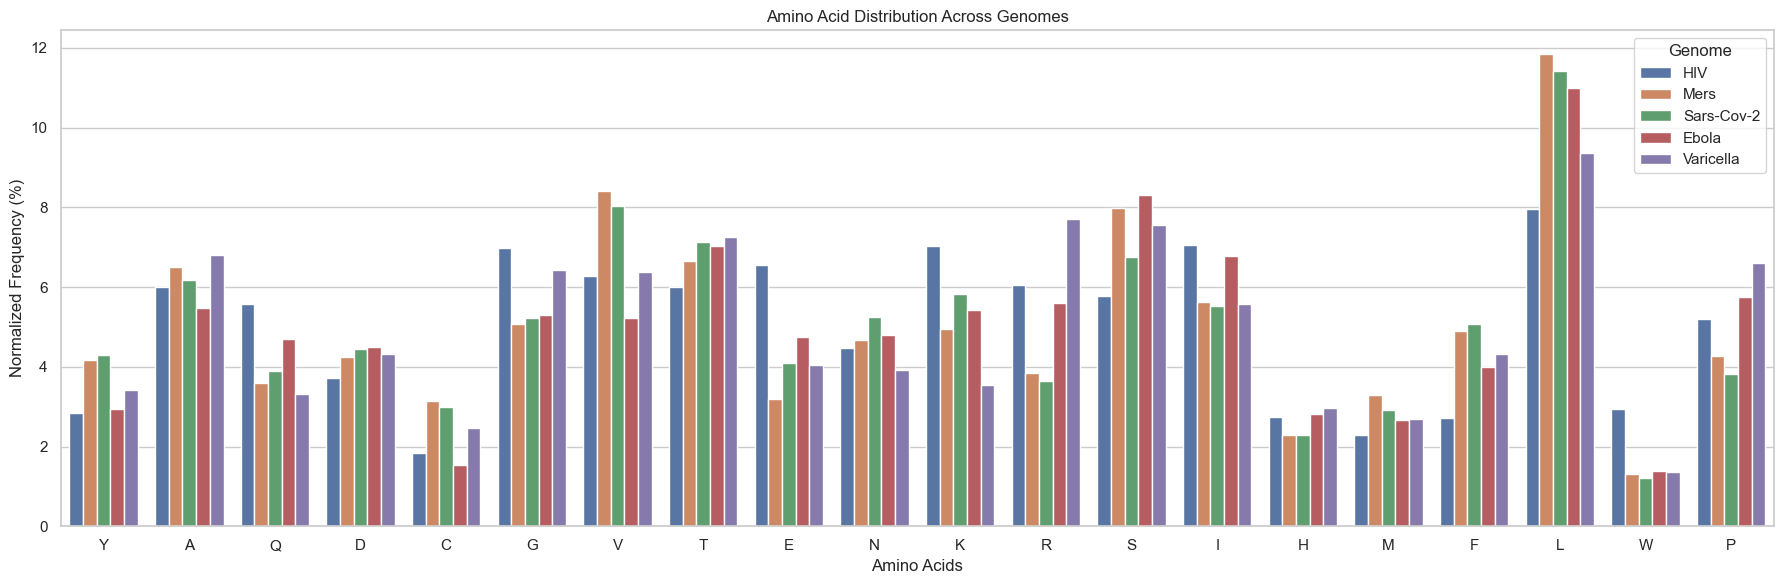

In [22]:
plot_amino_acid_distribution(df, orf_col='all_orfs', label_col='name')

In [23]:
def plot_avg_orf_count_per_label(df, orf_col='all_orfs', label_col='label'):
    # Create a new column with the number of ORFs (length of the list)
    df['orf_count'] = df[orf_col].apply(len)

    # Group by label and compute the mean
    avg_counts = df.groupby(label_col)['orf_count'].mean().reset_index()
    avg_counts.rename(columns={'orf_count': 'Average ORF Count'}, inplace=True)

    # Plot
    plt.figure(figsize=(12, 6))
    sns.barplot(data=avg_counts, x=label_col, y='Average ORF Count', palette='viridis')
    plt.title('Average Number of ORFs per Genome')
    plt.ylabel('Average ORF Count')
    plt.xlabel('Genome Label')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [26]:
df['orf_count'].unique()

array([ 14,  71,  60,  34, 320], dtype=int64)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_29568\3916477131.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_counts, x=label_col, y='Average ORF Count', palette='viridis')


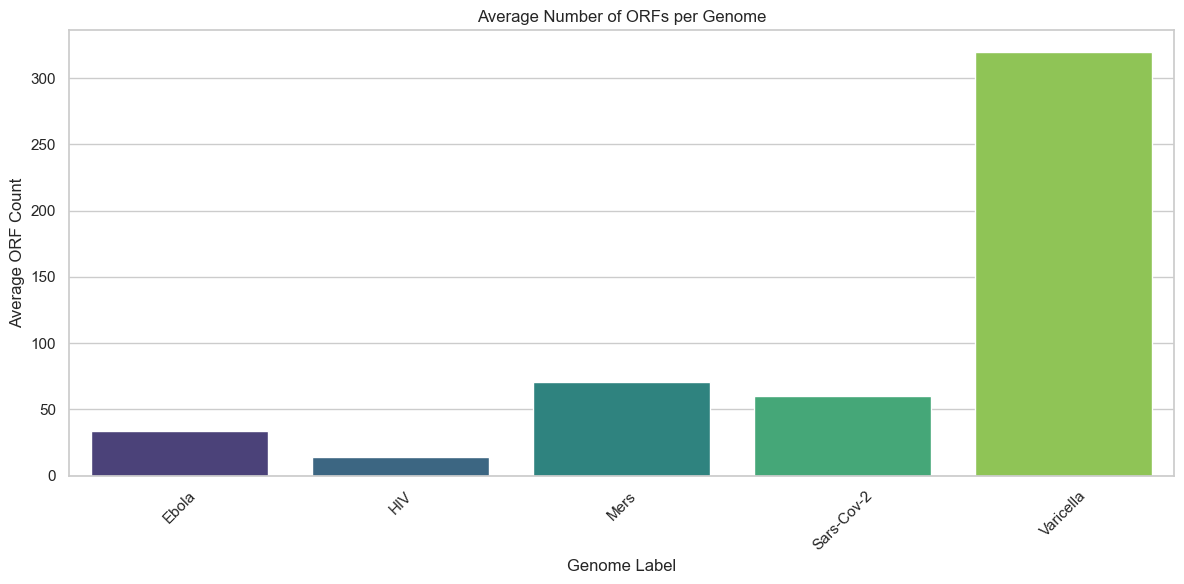

In [24]:
plot_avg_orf_count_per_label(df, orf_col='all_orfs', label_col='name')